## Regression Analysis

- find salary value using YearExperience variable
- since we need to find the value of salary variable, it is considered as a dependent variable
- since the dataset is a bivariate, the remaining (YearsExperience) becomes independent

### install required packages

In [21]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


### import packages

In [2]:
# needed for performing stats operations
import numpy as np

# needed to load the dataset
import pandas as pd

# needed to visualize the data (creating charts)
import matplotlib.pyplot as plt
import seaborn as sns

### load the dataset

In [9]:
# load the csv file and convert it into dataframe
# dataframe is a two dimensional array
df = pd.read_csv("Salary_Data.csv")

In [40]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


### Exploratory Data Analysis

In [6]:
# find the columns from the dataset
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [10]:
# get basic information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           33 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 660.0 bytes


In [11]:
# get the basic stats about the dataset
df.describe()

,YearsExperience,Salary
count,33.000000,33.000000
mean,5.921212,82760.303030
std,3.342413,34014.620992
min,1.100000,37731.000000
25%,3.200000,56957.000000
50%,5.100000,67938.000000
75%,8.700000,109431.000000
max,13.000000,156000.000000


Text(0.5, 1.0, 'Experience vs Salary')

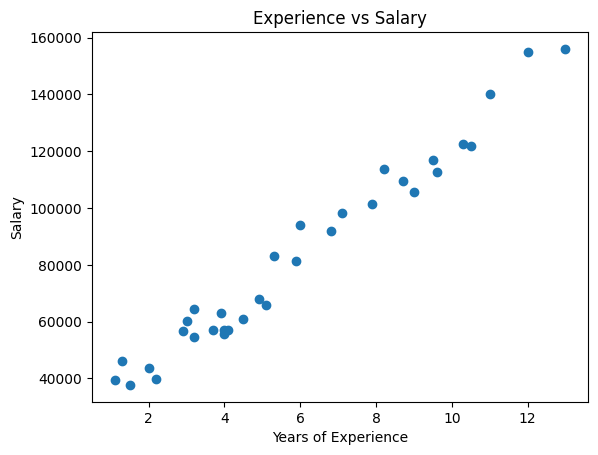

In [13]:
# visualize the data
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

In [15]:
# find the covariance between YearsExperiece and Salary
np.cov(df['YearsExperience'], df['Salary'])

# [[cov(x, x)  cov(x, y)]
#  [cov(y, x)  cov(y, y)]]

# cov(x, y) = cov(y, x)
# since the covariance is +ve, there must a +ve relationship between YearsExperience and Salary

array([[1.11717235e+01, 1.11831181e+05],
       [1.11831181e+05, 1.15699444e+09]])

In [16]:
# find the covariance between YearsExperiece and Salary
df.cov()

,YearsExperience,Salary
YearsExperience,11.171723,1.118312e+05
Salary,111831.180871,1.156994e+09


In [17]:
# find out if the relationship is strong or weak
np.corrcoef(df['YearsExperience'], df['Salary'])

# [[corrcoef(x, x)  corrcoef(x, y)]
#  [corrcoef(y, x)  corrcoef(y, y)]]

# corrcoef(x, x) = corrcoef(y, y) = 1
# corrcoef(x, y) = corrcoef(y, x)

# correlation coefficient
# -1 ---- 0 ---- +1

array([[1.        , 0.98364228],
       [0.98364228, 1.        ]])

### data cleansing

- no need of cleansing the dataset

### split the data

In [20]:
# split the data into X and Y

# independent variable (x)
# - it is mandatory to have it in two dimensional array or a dataframe
# - since we are removing the Salary variable, x will be having only one variable named YearsExperience
# - axis = 0 -> row, axis = 1 -> column
x = df.drop('Salary', axis=1)

# dependent variable (y)
# - it is mandatory to have it in one dimensional array or series
y = df['Salary']

### model (formula) building

In [22]:
# LinearRegression is the class / algorithm to build the model
from sklearn.linear_model import LinearRegression

# create a model object
model = LinearRegression()

# fit the data to find the model
model.fit(x, y)

LinearRegression()

### testing the model

In [23]:
# find the salary of a person having 15 years experience
salaries = model.predict([[15]])
salaries

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([173640.78093875])

### model visualization

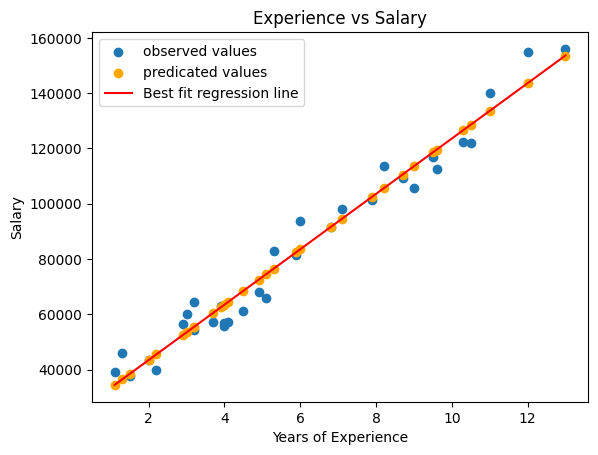

In [36]:
# visualize the data
plt.scatter(df['YearsExperience'], df['Salary'], label="observed values")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

# draw the best-fit regression line
plt.scatter(df['YearsExperience'], model.predict(x), color="orange", label="predicated values")
plt.plot(df['YearsExperience'], model.predict(x), color="red", label="Best fit regression line")

plt.legend()

### how the model is built

In [38]:
# y = f(x) => mx + c
# y = B1X1 + B2X2 + B3X3 + .. + B0
# y = B1 * YearsExperience + B0

# B0 = model.intercept_
# coefficient = model.coef_
# y = model.coef * Independent variables + model.intercept_

year_experience = 15
salary = model.coef_[0] * year_experience + model.intercept_
salary

np.float64(173640.78093875397)

In [39]:
model.coef_

array([10010.1995026])